In [ ]:
#clone repository
!git clone https://github.com/jaimesabalimperial/jaisalab.git
%cd jaisalab/ 

In [ ]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -r env/requirements.txt

In [1]:
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.utils.eval import get_snapshot_dirs
from os import listdir

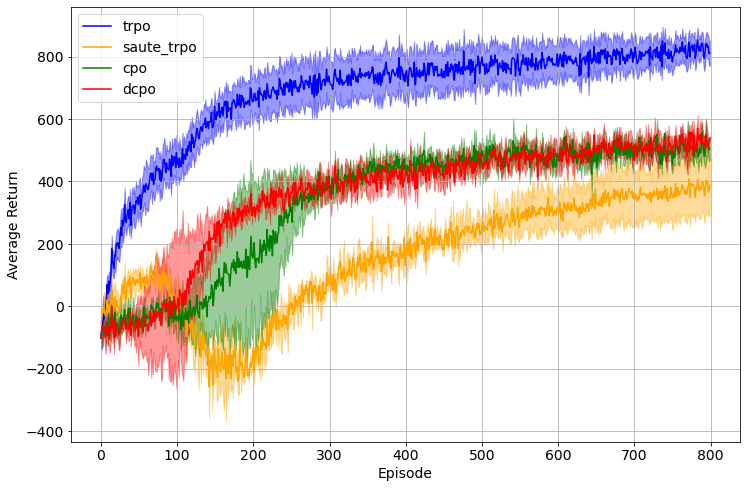

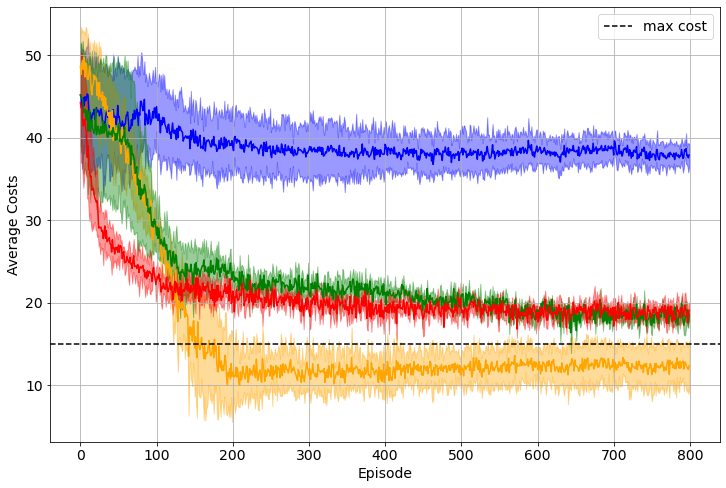

In [2]:
dirs = ['data5', 'data6', 'data7']

#RLPotter automatically calculates the mean and std of the recorded data 
#across all the replications of the specified experiments found in the list
#of data dirs
plotter1 = RLPlotter(fdir=['trpo_backlog', 'saute_trpo_backlog', 'cpo_backlog', 'dcpo_backlog'], data_dir=dirs)

plotter1.plot_returns(figsize=(12,8), fontsize=14)
plotter1.plot_costs(cost_lim=15, use_legend=False, figsize=(12,8), fontsize=14)

In [ ]:
data_dirs = ['ablation/'+dir for dir in listdir('ablation')]

plotter = RLPlotter(fdir=['dcpo_backlog', 'cpo_backlog', 'trpo_backlog', 'saute_trpo_backlog'] , data_dir=data_dirs)
plotter.plot_returns()
plotter.plot_costs(use_legend=True)

In [ ]:
#check the average final training costs for all experiments
for k, v in plotter.data.items():
    print(k)
    print(v['Evaluation/AverageSafetyReturn'][-1])
    print('\n')

In [1]:
from jaisalab.evaluation import Evaluator
from jaisalab.utils.eval import get_snapshot_dirs

In [ ]:
snapshot_dirs = get_snapshot_dirs('data3/')

violation_rates = {}
for snapshot in snapshot_dirs:
    exp_name = snapshot.split('/')[-1]
    evaluator = Evaluator(snapshot)
    epochs = evaluator.rollout(n_epochs=10)
    violation_rates[exp_name] = evaluator.evaluate_paths(epochs)

In [ ]:
print(violation_rates)